<center><img src="images/header.png" width=400></center>

<h1><center>Основы машинного обучения</center></h1>
<hr>
<h2><center>Методы обучения без учителя: Кластеризация (практика)</center></h2>
<h3><center>Шестаков Андрей</center></h3>

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

In [4]:
# Uncomment if you are using colab
# !mkdir ./data
# !wget https://github.com/vadim0912/park_ML/blob/master/lecture04/data/diet.csv -O ./data/diet.csv
# !wget https://github.com/vadim0912/park_ML/blob/master/lecture04/data/snsdata.csv -O ./data/snsdata.csv

# Применение K-means

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.

In [5]:
df_sns = pd.read_csv('data/snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

#### Задание

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)

In [18]:
## Your Code Here
X = df_sns.iloc[:, 4:].values
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
X_norm

array([[-0.33221726, -0.35769737, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-0.33221726,  1.06004883, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-0.33221726,  1.06004883, -0.2428741 , ...,  2.02790809,
        -0.22040264, -0.1749076 ],
       ...,
       [-0.33221726,  1.06004883, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-0.33221726, -0.35769737, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [ 2.15319868, -0.35769737, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ]])

In [21]:
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters=9, random_state=123)

In [23]:
kmeans.fit(X_norm)

KMeans(n_clusters=9, random_state=123)

In [24]:
kmeans.labels_

array([0, 7, 0, ..., 0, 0, 0])

In [27]:
kmeans.cluster_centers_.shape

(9, 36)

In [28]:
kmeans.inertia_

857207.4996345129

In [29]:
df_keywords = df_sns.iloc[:, 4:].assign(labels = kmeans.labels_)

In [30]:
df_keywords

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,7
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
for c, df_group in df_keywords.groupby('labels'):
    print('='*10)
    print('cluster = {}'.format(c))
    
    print(
        df_group.drop(['labels'], axis=1)\
        .mean().\
        sort_values(ascending=False).\
        head(10)
    )

cluster = 0
music         0.540477
god           0.312362
dance         0.213320
hair          0.180487
shopping      0.167117
basketball    0.160777
football      0.158073
band          0.154239
cute          0.148783
rock          0.147161
dtype: float64
cluster = 1
god           4.742925
jesus         2.018868
church        1.740566
bible         1.108491
music         1.084906
hair          0.459906
band          0.410377
dance         0.389151
die           0.360849
basketball    0.351415
dtype: float64
cluster = 2
hollister      1.522892
abercrombie    1.168675
shopping       0.920482
hair           0.913253
music          0.906024
dance          0.693976
mall           0.669880
cute           0.610843
god            0.457831
clothes        0.415663
dtype: float64
cluster = 3
blonde      327.0
sex          22.0
hair         12.0
god          10.0
death         6.0
die           6.0
drunk         6.0
football      2.0
dress         2.0
sexy          1.0
dtype: float64
cluster = 4


In [33]:
df_keywords.labels.value_counts()

0    20345
7     5034
4     1026
5      932
2      830
8      764
6      644
1      424
3        1
Name: labels, dtype: int64

# Рационы питания в странах

Загрузите набор данных о пищевом рационе в разных странах мира `diet.csv`

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [35]:
df = pd.read_csv('data/diet.csv', sep=';').iloc[:, :-1]

In [36]:
df.head()

,Countries,Energy (kcal/day),Protein (g/day),Fats (g/day),Carbohydrates (g/day),Animal Products + (kcal/day),Animal Fats (kcal/day),Bovine Meat (kcal/day),"Butter, Ghee (kcal/day)",Cheese (kcal/day),...,Soyabean Oil (kcal/day),Starchy Roots (kcal/day),Sugar & Sweeteners (kcal/day),Sugar (Raw Equivalent) (kcal/day),"Sugar, Raw Equivalent (kcal/day)","Sugar, Refined Equiv (kcal/day)",Vegetable Oils (kcal/day),Vegetables (kcal/day),Wheat (kcal/day),Wine (kcal/day)
0,Albania,2860.0,96,86,425.50,813.0,49,62,11,50,...,2,57,193,187,191,187,174,94,1166,6
1,Argentina,2980.0,94,100,426.00,823.0,72,342,28,90,...,43,100,406,337,405,337,311,51,914,59
2,Australia,3120.0,107,134,371.50,1033.0,124,142,62,107,...,17,87,423,407,415,407,435,67,559,39
3,Austria,3740.0,111,162,459.50,1219.0,320,59,102,193,...,89,113,437,404,424,404,442,61,617,55
4,Bangladesh,2200.0,48,25,445.75,65.0,5,5,3,0,...,48,42,59,29,59,29,131,10,180,0


In [37]:
scaler = StandardScaler()
X = df.iloc[:, 1:].values
X_norm = scaler.fit_transform(X)


1. Отнормируйте данные с помощью `RobustScaler` или `StandardScaler`
2. Используйте метод K-средних. Выберите число кластеров с помощью критерия силуэта
3. Найдите выборосы и проинтерпретируйте кластеры

In [ ]:
## Your Code Here

## Оценка `epsilon` для DBSCAN

То что нам не нужно определять количество выходных кластеров в DBSCAN - это конечно хорошо, но как определить `min_pts` и `epsilon`?) Есть одна методика

Будем считать, что MinPts нам дан свыше (например MinPts = 2). Воспользуемся следующим способом оценки:

* Нормализуем признаки, например с помощью `RobustScaler` или `StandartScaler`
* Расчитаем расстояние до k=MinPts ближайшего соседа каждой точки (класс `NearestNeighbors` и метод `kneighbors`)
* Отсортируем полученный массив и выведите его на график
* По графику будет примерно понятно, сколько точек уйдет в шум, а сколько попадет в полноценный кластер

In [38]:
from sklearn.neighbors import NearestNeighbors

In [39]:
minpts = 2
nn = NearestNeighbors(n_neighbors=minpts)
nn.fit(X_norm)

NearestNeighbors(n_neighbors=2)

In [42]:
d, idx = nn.kneighbors(X_norm, return_distance=True)

In [46]:
d2 = d[:, 1]
d2 = np.sort(d2)

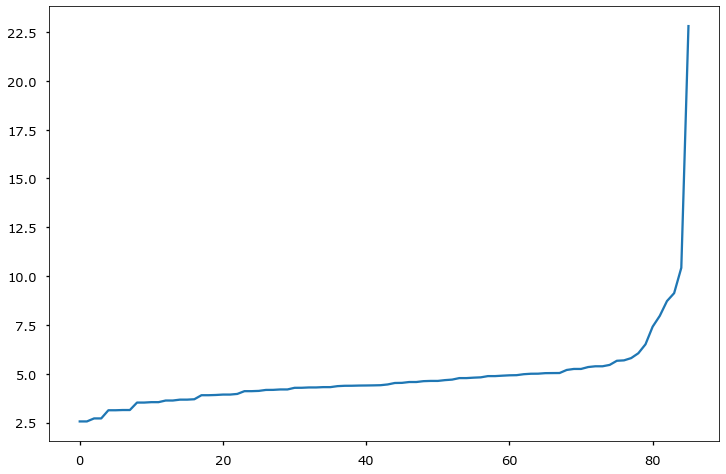

In [47]:
plt.plot(d2)

In [68]:
eps = 8
dbscan = DBSCAN(eps=eps, min_samples=minpts)
dbscan.fit(X_norm)

DBSCAN(eps=8, min_samples=2)

In [69]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0], dtype=int64)

In [70]:
df.loc[:, 'labels'] = dbscan.labels_

In [71]:
df.labels.value_counts()

 0    82
-1     4
Name: labels, dtype: int64

In [72]:
df[df.labels == -1].T

,39,53,66,67
Countries,Iran,Mongolia,Saint Lucia,Samoa
Energy (kcal/day),360.2,2250,2960,2910
Protein (g/day),3090,79,95,84
Fats (g/day),83,84,81,133
Carbohydrates (g/day),61,294.5,462.75,344.25
Animal Products + (kcal/day),552.25,872,816,826
Animal Fats (kcal/day),297,72,78,125
Bovine Meat (kcal/day),49,159,35,39
"Butter, Ghee (kcal/day)",29,4,25,34
Cheese (kcal/day),49,5,54,2


# Задача про кластеризацию текстов (ДЗ)

Рассмотрим коллекцию новостных сообщений за первую половину 2017 года. Про каждое новостное сообщение известны:
* его заголовок и текст
* дата его публикации
* событие, о котором это новостное сообщение написано 
* его рубрика 

In [ ]:
df = pd.read_csv('./data/news.csv', encoding='utf8')
df.head()

In [ ]:
df.loc[:, 'class'].value_counts()

Попробуем кластеризовать документы (каким-либо методом) и сравним полученное разбиение с данными рубликами с помощью ARI

### Стандартная предобработка текстов

In [ ]:
import re

# Оставляем только кириллические символы
regex = re.compile(u"[А-Яа-я]+")

def words_only(text, regex=regex):
    return " ".join(regex.findall(text))


df.text = df.text.str.lower()
df.loc[:, 'text'] = df.text.apply(words_only)

In [ ]:
import nltk

In [ ]:
from nltk.corpus import stopwords

# Удаляем стоп-слова
mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', u'также',  'т', 'д', '-', '-']

def  remove_stopwords(text, mystopwords = mystopwords):
    try:
        return u" ".join([token for token in text.split() if not token in mystopwords])
    except:
        return u""
    
df.text = df.text.apply(remove_stopwords)   

In [1]:
%%time 
from pymystem3 import Mystem


# нормализуем текст
m = Mystem()
def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "

df.text = df.text.apply(lemmatize)

ModuleNotFoundError: No module named 'pymystem3'

In [ ]:
mystoplemmas = [u'который', u'прошлый', u'сей', u'свой', u'наш', u'мочь']

# Еще кое-что удаляем
def  remove_stoplemmas(text, mystoplemmas = mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""

df.text = df.text.apply(remove_stoplemmas)  

In [ ]:
df.text[0]

## Вычисление сходства

С помощью `TfidfVectorizer` и `pairwise_distances` расчитайте косинусное расстояние между всеми парами документов к корпусе

Запишите результат в переменную `S`

In [ ]:
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances

In [ ]:
vect = TfidfVectorizer()
texts = df.text.values

In [ ]:
# Your Code Here

In [ ]:
S = ...

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(data=S, cmap = 'Spectral').set(xticklabels=[],yticklabels=[])


Вы должны пронаблюдать, что между некоторыми текстами есть довольно выскокое сходство по содержанию слов. 

Попробуем их кластеризовать

## DBSCAN или KMeans
* Воспользуйтесь методикой оценки параметров для алгоритма DBSCAN. Используйте косинусную меру близости
* Выделите кластеры. Для каждого кластера (кроме -1, если он будет) выведите несколько текстов и умозрительно определите его тематику
* Оцените сходство с изначальными рубриками визуально (с помощью матрицы перемешивания) и с помощью ARI

In [ ]:
# Your Code Here

In [ ]:
labels = ...

In [ ]:
adjusted_rand_score(true_label, labels)

In [ ]:
pd.crosstab(df.loc[:, 'class'], labels)